# Binary Classification

### Problem Statement

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Deskripsi Data

1.   Gender: Jenis kelamin pelanggan (Male, Female)
2.   Partner: Status pernikahan pelanggan (yes, no)
3.   Tenure: Lama beralangganan (integer; bulan)
4.   PhoneService: Apakah pelanggan menggunakan telfon (yes, no)
5.   PaperlessBilling:  Apakah pelanggan menggunakan paperless billing (yes, no)
6.   MonthlyCharges: Biaya bulanan (numeric; usd)
7.   Churn: Apakah pelanggan berhenti berlangganan atau tidak (yes, no)

> Dalam kasus ini kita akan melakukan prediksi Churn sebagai variabel respon.




## 1. Import Libraries and Data

IMPORT PACKAGES

In [1]:
# Import Package
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

IMPORT DATA

In [2]:
df = pd.read_csv("D:/Data Scientist/Dataset/Dataset - DS - 13-14/TelcoChurn.csv")
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


## 2. Exploratory Data Analysis (EDA)

Lakukan eksplorasi data churn!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


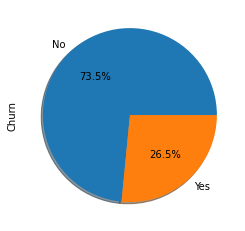

In [4]:
# Mencari perbandingan label/class
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Dapat dilihat bahwa pelanggan yang TIDAK berhenti berlangganan ada 73.5%

In [5]:
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Dapat dilihat dari tenure bahwa minimal lama berlangganan adalah 0. Akan kita cari tahu apakah pelanggan yang menggunakan telfon(PhoneService) berpengaruh terhadap tenure?

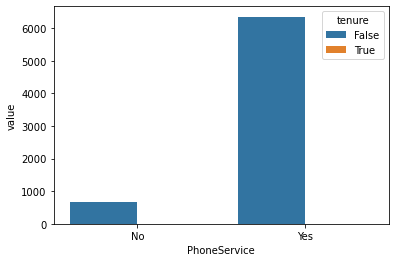

In [6]:
# Buat Crosstab antara phoneservice dan tenure
phoneservice_tenure = pd.crosstab(df['PhoneService'], (df['tenure']==0))

# Buat hasil crosstab menjadi dataframe
stacked = phoneservice_tenure.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.PhoneService, y=stacked.value, hue=stacked.tenure)
plt.show()

Dari hasil visualisasi diatas diketahui bahwa pelanggan yang menggunakan telfon memiliki tenure karena mereka mungkin lebih terikat dengan layanan yang diberikan. Dibandingkan dengan pelanggan yang tidak memiliki telfon.

Kita cek status pernikahan, apakah mempengaruhi churn?

<AxesSubplot:xlabel='Partner', ylabel='value'>

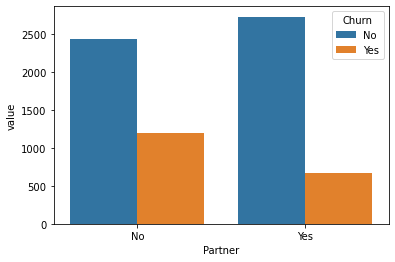

In [7]:
# Cek status pernikahan dan churn
duit = pd.crosstab(df['Partner'], (df['Churn']))

# Buat hasil crosstab menjadi dataframe
employ_stacked = duit.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=employ_stacked.Partner, y=employ_stacked.value, hue=employ_stacked.Churn)

Dari hasil visualisasi dapat diketahui bahwa pelanggan yang sudah menikah ataupun belum menikah merupakan pelanggan yang tidak berhenti berlangganan.

## 3 Preprocessing

Lakukan preprocessing data churn!

In [8]:
# cek missing value
df.isnull().sum()

gender              0
Partner             0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Label Encoder

In [9]:
kategori = ["gender", "Partner", "PhoneService", "PaperlessBilling", "Churn"]
df_cat = df[kategori]
df_cat.head()

,gender,Partner,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,No,Yes,Yes,Yes
3,Male,No,No,No,No
4,Female,No,Yes,Yes,Yes


In [10]:
encoded_data = LabelEncoder()

for feature in kategori :
    if feature in df.columns.values :
        df[feature] = encoded_data.fit_transform(df[feature])
        

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,1,0,34,1,0,56.95,0
2,1,0,2,1,1,53.85,1
3,1,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1


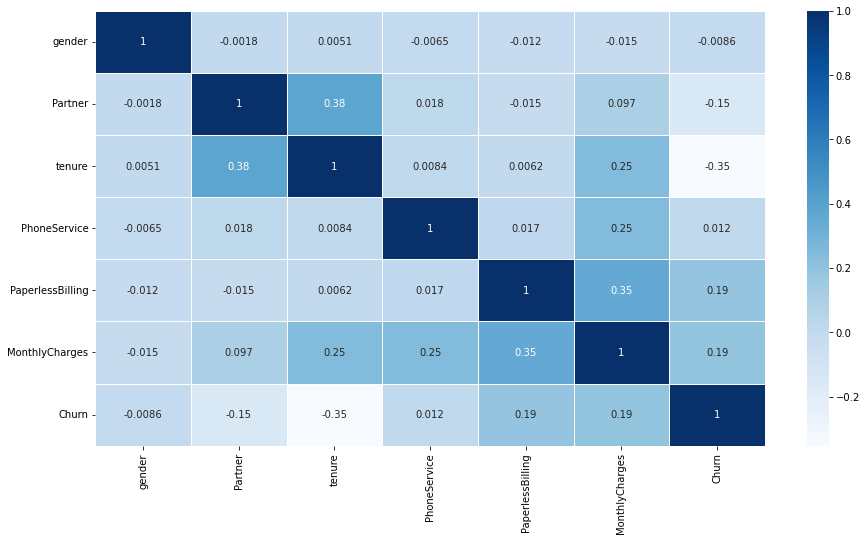

In [11]:
# Cek korelasi, mengasumsikan bahwa data bertime interval-rasio
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [12]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Churn"].sort_values()
korelasi

tenure             -0.352229
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

Menggunakan data testing berjumlah 30% dari total data, dan data training berjumlah 70% dari total data.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df.drop("Churn", axis=1)
#X = scaler.fit_transform(X)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("y Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
y Test :  2113


### Stats Model (Logistic Regression)

In [14]:
Input = sm.add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Bagaimana akurasi model logistic regression dengan stats model?

In [15]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457227
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.206      
Dependent Variable: Churn            AIC:              4520.2572  
Date:               2024-04-11 22:42 BIC:              4559.2757  
No. Observations:   4930             Log-Likelihood:   -2254.1    
Df Model:           5                LL-Null:          -2838.9    
Df Residuals:       4924             LLR p-value:      1.1780e-250
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.2272   0.0704  -3.2269 0.0013 -0.3652 -0.0892
Partner           -0.1888   0.0785  -2.4052 0.0162 -0

In [16]:
#odds ratio
round(np.exp(result.params), 3)

gender              0.797
Partner             0.828
tenure              0.946
PhoneService        0.205
PaperlessBilling    1.435
MonthlyCharges      1.029
dtype: float64

Prediksi Model

In [17]:
prediction = result.predict(X_test)

In [18]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
185,0.694126,1,1
2715,0.047231,0,0
3825,0.016265,0,0
1807,0.627099,1,1
132,0.016522,0,0


Evaluation Model

In [19]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.787
Test precision =  0.626
Test recall =  0.531
Test f-score =  0.575


### SKLEARN (Logistic Regression)

In [20]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

Bagaimana akurasi model regresi logistik dengan SKLEARN?

In [21]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,1,0,1,24.80,1,0
2715,1,0,41,1,1,25.25,0,0
3825,0,1,52,1,0,19.35,0,0
1807,0,0,1,1,0,76.35,1,1
132,1,0,67,1,0,50.55,0,0


In [22]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.790


Dari kedua model didapat bahwa akurasi model logistic regression dengan sklearn hasilnya hampir sama dengan statsmodels.

Pada model logistic regression dengan sklearn, perbedaan akurasi antara train data dan test data sangatlah dekat, hal ini memungkinkan bahwa model yang dihasilkan tidak overfitting.

### Model Validation Logistic Regression SKLEARN

Bagaimana hasil model validation dengan KFold, StratifiedKFold, dan GridSearchCV?

Menerapkan KFold cross validation

In [23]:
#Memilih KFold (k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
logreg = LogisticRegression(solver='saga', max_iter=1000, penalty=None)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.786


In [25]:
np.logspace(-3, 3, num=15)

array([1.00000000e-03, 2.68269580e-03, 7.19685673e-03, 1.93069773e-02,
       5.17947468e-02, 1.38949549e-01, 3.72759372e-01, 1.00000000e+00,
       2.68269580e+00, 7.19685673e+00, 1.93069773e+01, 5.17947468e+01,
       1.38949549e+02, 3.72759372e+02, 1.00000000e+03])

In [26]:
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                "penalty" : ['l1', 'l2']}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold, verbose = 3)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.782 total time=   0.4s
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.789 total time=   0.4s
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.798 total time=   0.4s
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.795 total time=   0.4s
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.789 total time=   0.4s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.788 total time=   0.8s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.779 total time=   0.7s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.786 total time=   0.7s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.790 total time=   0.7s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.784 total time=   0.7s
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.784 total time=   0.5s
[CV 2/5] END ................C=0.01, penalty=l1;

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=0.1, penalty=l1;, score=0.792 total time=   1.3s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=0.1, penalty=l1;, score=0.771 total time=   1.3s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=0.1, penalty=l1;, score=0.788 total time=   1.3s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=0.1, penalty=l1;, score=0.798 total time=   1.3s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=0.1, penalty=l1;, score=0.780 total time=   1.3s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.792 total time=   1.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.773 total time=   1.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.791 total time=   1.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.796 total time=   0.9s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.782 total time=   1.1s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.792 total time=   1.1s
[CV 2/5] END ...................C=1, penalty=l1;, score=0.772 total time=   1.0s
[CV 3/5] END ...................C=1, penalty=l1;, score=0.790 total time=   1.1s
[CV 4/5] END ...................C=1, penalty=l1;, score=0.797 total time=   0.6s
[CV 5/5] END ...................C=1, penalty=l1;, score=0.779 total time=   1.1s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.792 total time=   0.8s
[CV 2/5] END ...............

In [27]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = grid_search_lr.best_estimator_
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7880152550164526]
f1 scores:  [0.5168077454882073]
Precision scores:  [0.6529275549397525]
Recall scores:  [0.4280298919840317]


In [28]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7903454803596782
Recall score:  0.6845070422535211


In [29]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.787
Accuracy of logistic regression classifier test data: 0.790


Untuk hasil evaluasi model didapat hasil yang cukup bagus, dan apabila di lihat hasil scoring pada data train dan test, score menunjukkan angka yang bagus dan tidak ada perbedaan yang signifikan antara keduanya. dapat disimpulkan bahwa model tidak mengalami underfitting dan overfitting.

Menerapkan Stratified k-fold cross validation

In [30]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
logreg = LogisticRegression(solver='saga', max_iter=1000, penalty="l2")
scores = cross_val_score(logreg, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.787


In [32]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty' : ["l1", "l2"]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=skfold, verbose=3)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.776 total time=   0.4s
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.787 total time=   0.4s
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.799 total time=   0.4s
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.772 total time=   0.4s
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.806 total time=   0.4s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.776 total time=   0.8s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.784 total time=   0.7s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.788 total time=   0.7s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.776 total time=   0.7s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.809 total time=   0.8s
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.775 total time=   0.4s
[CV 2/5] END ................C=0.01, penalty=l1;

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=0.1, penalty=l1;, score=0.790 total time=   2.1s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=0.1, penalty=l1;, score=0.772 total time=   1.3s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=0.1, penalty=l1;, score=0.808 total time=   1.3s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.784 total time=   0.9s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.782 total time=   0.8s


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=0.1, penalty=l2;, score=0.787 total time=   1.1s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.773 total time=   1.1s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.810 total time=   1.1s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.786 total time=   0.6s
[CV 2/5] END ...................C=1, penalty=l1;, score=0.781 total time=   0.6s
[CV 3/5] END ...................C=1, penalty=l1;, score=0.787 total time=   1.3s
[CV 4/5] END ...................C=1, penalty=l1;, score=0.774 total time=   1.2s
[CV 5/5] END ...................C=1, penalty=l1;, score=0.806 total time=   1.1s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.785 total time=   0.4s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.781 total time=   0.4s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.787 total time=   1.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.775 total time=   0.9s
[CV 5/5] END ...............

In [33]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = grid_search_lr.best_estimator_
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7875893202787276]
f1 scores:  [0.5156836602521095]
Precision scores:  [0.6518301256222466]
Recall scores:  [0.4269617840609241]


In [34]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7903454803596782
Recall score:  0.6845070422535211


In [35]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.787
Accuracy of logistic regression classifier test data: 0.790


### SVM

In [36]:
# Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of svm classifier:0.785
Accuracy of svm classifier:0.794


Model validasi GridSearchCV

In [38]:
# Menggunakan GridSearchCV dan cross-validation dalam model SVM
param_grid_svm = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search_svm = GridSearchCV(SVC(), param_grid_svm,cv=kfold, verbose=3)
grid_search_svm.fit(X, y)
print('Best parameters:{}'.format(grid_search_svm.best_params_))
print('Best GridSearchCV validation score:{:.3}'.format(grid_search_svm.best_score_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.735 total time=   2.9s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.733 total time=   3.0s
[CV 3/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.725 total time=   2.9s
[CV 4/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.733 total time=   2.9s
[CV 5/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.747 total time=   2.9s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.735 total time=   2.8s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.733 total time=   2.9s
[CV 3/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.725 total time=   2.8s
[CV 4/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.733 total time=   2.9s
[CV 5/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.747 total time=   3.0s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.735 total time=   3.1s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf

In [43]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
clf = SVC(C=100, kernel='rbf', gamma=0.001)
clf.fit(X_train, y_train)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)


 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7880152550164526]
f1 scores:  [0.5168077454882073]
Precision scores:  [0.6529275549397525]
Recall scores:  [0.4280298919840317]


Bagaimana akurasi model SVM?

In [44]:
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of svm classifier:0.796
Accuracy of svm classifier:0.792


### Model Validation SVM

Bagaimana hasil model validation dengan KFold, StratifiedKFold, dan GridSearchCV?

Model validation dengan KFold cross validation

In [45]:
#KFold
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.792


Model validation dengan Stratified KFold Cross Validation

In [46]:
#Stratified KFold 
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.789
